<a href="https://colab.research.google.com/github/CatalinaPerez008/Mercado-de-capitales/blob/main/TP1/Proyecto_final_MBG_CC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **BIENVENIDOS AL SIMULADOR DE PRECIOS DE ACCIONES CON MBG**


---


**Integrantes:** Maria Valentina Rodriguez Zambrano y Catalina Pérez Ballesteros

Este código permite predecir el precio de acciones que cotizan en bolsa, a partir del Movimiento Browniano. Para ello, tomamos los datos de las bases de datos de Yahoo Finance.

In [3]:
import yfinance as yf
import pandas as pd
from functools import reduce


#Esta función recibe el código con el que se identifica cada acción (ticker)
# y devuelve los datos historicos del mercado de la empresa correspondiente
# en formato DataFrame

def DatHist(simbolo):
  datos=yf.download(simbolo, period='1y', interval='1d', progress=False,  auto_adjust=True)
  return datos

#La siguiente funcion se encargara de verificar los tickers que de el usuario
#Esta función insiste al usuario hasta que de un ticker que tenga datos en Yahoo Finanzas
#O hasta que el usuario decida detener el proceso dejando la casilla en blanco.
#Regresa los datos históricos descargados desde Yahoo Finanzas
#O el valor 0, respectivamente

def VerifyTicker():

  while True:
    print()
    ticker=input("Ingrese el símbolo bursátil (ticker) de la empresa: ")

    if ticker=='':
      return 0

    else:
      datos=DatHist(ticker)

      if datos.empty:
        print("No se encontraron datos para el ticker ingresado")
        print("Revise el ticker antes de ingresarlo nuevamente")

      else:
        return ticker, datos


#Esta función insiste hasta que el usuario ingrese un número mayor que cero
#en la cantidad que quiere invertir

def VerifyPositive(numero):
  while numero <= 0:
    print("El número ingresado debe ser mayor que cero")
    numero=float(input("Por favor ingrese un numero mayor que cero: "))
  return numero


#La siguiente función sacará una lista con los rendimientos relativos diarios
# a partir de los datos obtenidos en Yahoo Finance

def LisRendDiar(ticker):
  lista=list(DictDatos[ticker]["Close"]) #precios de cierre diarios
  cierre=[]
  for i in range(1,len(lista)):
    aux=(lista[i]-lista[i-1])/lista[i-1] #cambio porcentual diario (rendimiento relativo), cuánto he ganado o perdido frente ayer
    cierre.append(aux)
  return cierre


#La siguiente funcion va a devolver la media y la desviación estándar de una lista de números
def Parametros(lista):
  promedio=reduce(lambda x,y:x+y, lista)/len(lista)
  aux=list(map(lambda x:(x-promedio)**2, lista)) #diferecias al cuadrado para la desviacion estandar
  desviacion=(reduce(lambda x,y: x+y, aux) /len(aux))**(1/2)

  return promedio,desviacion



#Usamos dos diccionarios: Uno para guardar el monto que el usuario va a invertir en cada empresa
#El otro para guardar los datos descargados de Yahoo Finanzas

DictMontos={}
DictDatos={}



print("***Bienvenid@ al simulador de acciones con MBG***\n")

#Aquí podriamos agregar una descripción del programa

print("A continuación podrá ingresar el símbolo bursátil (ticker) de la empresa que desee")
print("Después se le pedirá que ingrese el monto que desea invertir (en dólares)")
print("Cuando no quiera ingresar más empresas, deje el espacio en blanco y presione enter")

j=1

while True:
  print()
  print(f"Empresa {j}")


  Aux=VerifyTicker()

  if Aux==0:
    break
  else:
    ticker,datos=Aux
    DictDatos[ticker]=datos

    print()
    monto=float(input("Ingrese el monto (en dólares) que va a invertir en esta empresa (use '.' como separador decimal): "))
    monto=VerifyPositive(monto)
    DictMontos[ticker]=monto

    j+=1



***Bienvenid@ al simulador de acciones con MBG***

A continuación podrá ingresar el símbolo bursátil (ticker) de la empresa que desee
Después se le pedirá que ingrese el monto que desea invertir (en dólares)
Cuando no quiera ingresar más empresas, deje el espacio en blanco y presione enter

Empresa 1

Ingrese el símbolo bursátil (ticker) de la empresa: NVIDIA


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['NVIDIA']: YFPricesMissingError('possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")')


No se encontraron datos para el ticker ingresado
Revise el ticker antes de ingresarlo nuevamente

Ingrese el símbolo bursátil (ticker) de la empresa: GM

Ingrese el monto (en dólares) que va a invertir en esta empresa (use '.' como separador decimal): 100

Empresa 2

Ingrese el símbolo bursátil (ticker) de la empresa: TSLA

Ingrese el monto (en dólares) que va a invertir en esta empresa (use '.' como separador decimal): 200

Empresa 3

Ingrese el símbolo bursátil (ticker) de la empresa: NVDA

Ingrese el monto (en dólares) que va a invertir en esta empresa (use '.' como separador decimal): 300

Empresa 4

Ingrese el símbolo bursátil (ticker) de la empresa: 


**La media** (o drift) captura la dirección en la que se moverá el activo. En términos financieros, refleja el rendimiento esperado por unidad de tiempo (ej: diario, anual).

Si μ > 0: El activo tiende a apreciarse (tendencia alcista).

Si μ < 0: El activo tiende a depreciarse (tendencia bajista).

**La desviación estándar** (volatilidad o riesgo) mide la magnitud de las fluctuaciones del precio alrededor de su media, nos dirá qué tanto varia el activo. Si es un activo muy variable tendrá un mayor riesgo ya que hay menor certeza en su comportamiento

Un σ alto indica precios muy volátiles (mayor riesgo).

Un σ bajo sugiere precios estables (menor riesgo).

***Bienvenid@ al simulador de acciones con MBG***

A continuación podrá ingresar el símbolo bursátil (ticker) de la empresa que desee
Después se le pedirá que ingrese el monto que desea invertir (en dólares)
Cuando no quiera ingresar más empresas, deje el espacio en blanco y presione enter

Empresa 1

Ingrese el símbolo bursátil (ticker) de la empresa, si quiere finalizar oprima enter: BYD

Ingrese el monto (en dólares) que va a invertir en esta empresa (use '.' como separador decimal): 200

Empresa 2

Ingrese el símbolo bursátil (ticker) de la empresa, si quiere finalizar oprima enter: NVDA

Ingrese el monto (en dólares) que va a invertir en esta empresa (use '.' como separador decimal): 300

Empresa 3

Ingrese el símbolo bursátil (ticker) de la empresa, si quiere finalizar oprima enter: AAPL

Ingrese el monto (en dólares) que va a invertir en esta empresa (use '.' como separador decimal): 100

Empresa 4

Ingrese el símbolo bursátil (ticker) de la empresa, si quiere finalizar oprima e

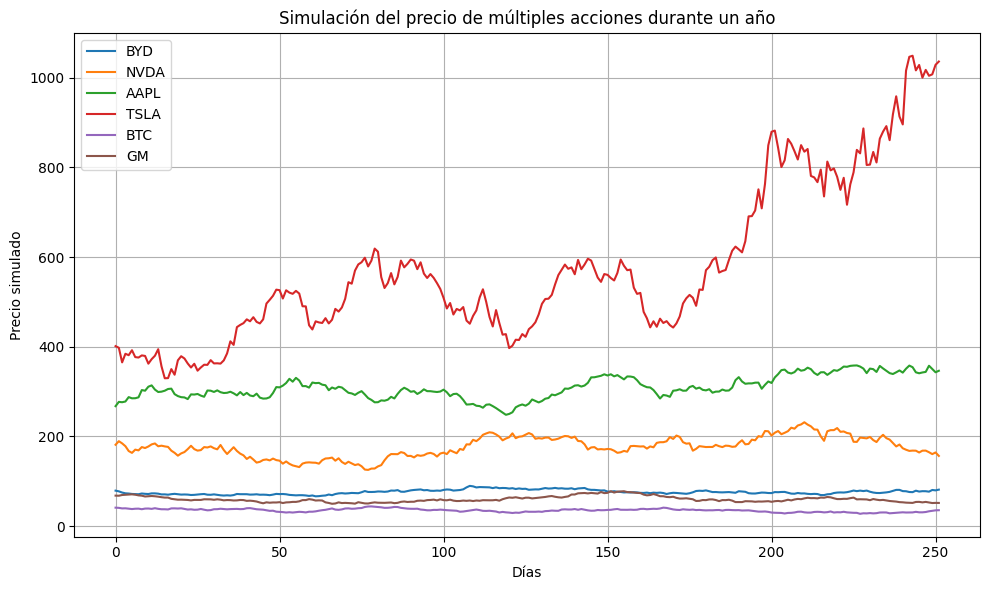


Resultados de la simulación de inversión (ordenados por retorno):
Acción  Monto Invertido (US$)  Precio Inicial (US$)  Precio Final Simulado (US$)  Valor Final (US$)  Retorno (US$)  Retorno (US%)
  TSLA                  100.0                401.25                      1035.86             258.16         158.16         158.16
  AAPL                  100.0                267.44                       346.32             129.49          29.49          29.49
   BYD                  200.0                 79.03                        81.30             205.74           5.74           2.87
   BTC                   50.0                 41.07                        35.43              43.13          -6.87         -13.74
  NVDA                  300.0                181.36                       156.46             258.82         -41.18         -13.73
    GM                  200.0                 67.93                        51.61             151.94         -48.06         -24.03

Los resultados se han 

In [12]:
import yfinance as yf
import pandas as pd
from functools import reduce
import math as m
import random
import matplotlib.pyplot as plt

#Esta función recibe el símbolo bursatil o código de cada acción (ticker)
#y devuelve los datos historicos (1 año) de mercado de la empresa correspondiente
# en formato DataFrame

def DatHist(simbolo):
  datos=yf.download(simbolo, period='1y', interval='1d', progress=False,  auto_adjust=True)
  return datos

#La siguiente funcion se encargara de verificar los tickers que de el usuario
#Esta función insiste al usuario hasta que de un ticker que tenga datos en Yahoo Finanzas
#O hasta que el usuario decida detener el proceso dejando la casilla en blanco.
#Regresa los datos históricos descargados desde Yahoo Finanzas
#O el valor 0, respectivamente
def VerifyTicker():

  while True:
    print()
    ticker=input("Ingrese el símbolo bursátil (ticker) de la empresa, si quiere finalizar oprima enter: ")

    if ticker=='':
      return 0

    else:
      datos=DatHist(ticker)

      if datos.empty:
        print("No se encontraron datos para el ticker ingresado")
        print("Revise el ticker antes de ingresarlo nuevamente")

      else:
        return ticker, datos


#Esta función insiste hasta que el usuario ingrese un número mayor que cero
#para la cantidad que desea destinar a la compra de esas acciones

def VerifyPositive(numero):
  while numero <= 0:
    print("El número ingresado debe ser mayor que cero")
    numero=float(input("Por favor ingrese un numero mayor que cero: "))
  return numero






#La siguiente función devolverá una lista con los rendimientos relativos diarios
# a partir de los datos obtenidos en Yahoo

def InfoRend(ticker,DictDatos):
  lista=list(DictDatos[ticker][("Close",ticker)])
  cierre=[]
  for i in range(1,len(lista)):
    aux=(lista[i]-lista[i-1])/lista[i-1]
    cierre.append(aux)

  return cierre


#La siguiente funcion va a devolver la media y la desviación estándar de una lista de números
def Parametros(lista):
  promedio=reduce(lambda x,y:x+y, lista)/len(lista)
  aux=list(map(lambda x:(x-promedio)**2, lista))
  desviacion=(reduce(lambda x,y: x+y, aux) /(len(aux)-1))**(1/2)

  return promedio,desviacion


#La siguiente función devolverá, dado el ticker, el precio actual de la acción
def PrecioActual(ticker,DictDatos):
  lista=list(DictDatos[ticker][("Close",ticker)])
  PrecioActual=lista[len(lista)-1] #ultimo precio es el mas reciente
  return PrecioActual
#ecuacion movimiento browniano
    #En la formula, hay otra variable-delta(t)- que no declaramos aquí porque en nuestro caso vale uno


#La siguiente función hará una simulación anual del precio de la acción en en proximo año
#Usando la fórmula discretizada del movimiento Browniano Geometrico
#(Regresa la simulación de los precios en el año en una lista)

def SimulacionAnual(ticker, DictDatos):

  S0=PrecioActual(ticker,DictDatos)
  mu, sigma = Parametros(InfoRend(ticker, DictDatos))

  Precios=[S0]

  #252 es el numero aproximado de días hábiles en el año

  for i in range (1,252):
    z=random.gauss(0,1)#para simular la aleatoriedad en el activo
    factor=m.exp(mu-0.5*sigma**2+sigma*z)
    S1=S0*factor #Precio futuro del activo
    Precios.append(S1)
    S0=S1
  return(Precios)


#Ahora  graficaremos lo precios teniendo en cuenta la predicción,
# para ello, utilizaremos la libreria matplotlib
def GraficaSimulaciones(DictSimulaciones):
  dias=[]
  for i in range(252): #Crea una lista de 252 números enteros representando los días hábiles bursátiles en un año
    dias.append(i)

  plt.figure(figsize=(10, 6)) # crea una figura (ancho, alto)

  for ticker in DictSimulaciones: #para cada acción toma sus precios simulados
    precios=DictSimulaciones[ticker]
    plt.plot(dias, precios, label=ticker)

#A continuación, personalizaremos el gráfico con sus ejes
  plt.xlabel('Días')
  plt.ylabel('Precio simulado')
  plt.title('Simulación del precio de múltiples acciones durante un año')
  plt.grid(True) #Activa la cuadrícula
  plt.legend() #leyenda que nos dira el nombre de cada acción
  plt.tight_layout() #ajuste automatico de espacios
  plt.show() #muestra el grafico

#Usamos dos diccionarios: Uno para guardar el monto que el usuario va a invertir en cada empresa
#El otro para guardar los datos descargados de Yahoo Finanzas
tickers=[]
DictMontos={}
DictDatos={}
j=1

#Lo que queremos que muestre el programa al iniciar
print("***Bienvenid@ al simulador de acciones con MBG***\n")

#Aquí podriamos agregar una descripción del programa

print("A continuación podrá ingresar el símbolo bursátil (ticker) de la empresa que desee")

print("Después se le pedirá que ingrese el monto que desea invertir (en dólares)")
print("Cuando no quiera ingresar más empresas, deje el espacio en blanco y presione enter")

j=1 #cuenta el numero de activos que hay y termina hasta que el tiquer esté vacío

while True:
  print()
  print(f"Empresa {j}")

  Aux=VerifyTicker()

  if Aux==0:
    break
  else:
    ticker,datos=Aux
    DictDatos[ticker]=datos
    tickers.append(ticker)

    print()
    monto=float(input("Ingrese el monto (en dólares) que va a invertir en esta empresa (use '.' como separador decimal): "))
    monto=VerifyPositive(monto)
    DictMontos[ticker]=monto

    j+=1

#El siguiente diccionario va a guardar las simulaciones por cada accion
DictSimulaciones={}

for ticker in DictDatos:
  DictSimulaciones[ticker]=SimulacionAnual(ticker, DictDatos)

GraficaSimulaciones(DictSimulaciones)

## Imprimir Retornos ##

# Se define el cálculo de retornos de inversión y se presenta en DataFrame
#recordando que en dicmontos se encuentra la cantidad a invertir en cada accion
#y en DictSimulaciones tenemos los precios futuros de cada acción

def calcular_retornos(DictMontos, DictSimulaciones):
    resultados = []

    for ticker in DictMontos: #para cada monto de la acción
        monto_inicial = DictMontos[ticker]
        precio_inicial = DictSimulaciones[ticker][0] #precio inicial de la acción
        precio_final = DictSimulaciones[ticker][-1] #precio futuro de la acción

        # se calcula cuántas acciones puede comprar de acuerdo al monto digitado
        acciones = monto_inicial / precio_inicial

        # Calcula el valor final de la inversión
        valor_final = acciones * precio_final #numero de acciones compradas por el precio futuro

        # Calcula el retorno en dólares y en porcentaje
        retorno_dolares = valor_final - monto_inicial #la ganancia sin tener en cuenta dividendos
        retorno_porcentaje = (retorno_dolares / monto_inicial) * 100


        #Define los valores que apareceran en el Dataframe
        resultados.append({
            'Acción': ticker,
            'Monto Invertido (US$)': round(monto_inicial, 2),
            'Precio Inicial (US$)': round(precio_inicial, 2),
            'Precio Final Simulado (US$)': round(precio_final, 2),
            'Valor Final (US$)': round(valor_final, 2),
            'Retorno (US$)': round(retorno_dolares, 2),
            'Retorno (US%)': round(retorno_porcentaje, 2)
        })

    # Crea un Dataframe con los resultados, utilizamos la libreria pandas
    df_resultados = pd.DataFrame(resultados)
    return df_resultados

# Se muestran los resultados de cada accion en un dataframe
# Primero llamamos la funcion del retorno para cada acción
if DictMontos:
    df_retornos = calcular_retornos(DictMontos, DictSimulaciones)

    # Ordenamos los datos de mayor a menor retorno en el Dataframe
    df_retornos = df_retornos.sort_values(by='Retorno (US$)', ascending=False)

    # Para mostrar los datos:
    print("\nResultados de la simulación de inversión (ordenados por retorno):")
    print(df_retornos.to_string(index=False)) #convierte DataFrame en cadena de texto, omitiendo la columna de indices

    # Guardamos los resultados de mayor a menor retorno en un archivo txt
    with open('resultados_simulacion.txt', 'w', encoding='utf-8') as f:
        f.write("*** Resultados de la simulación de inversión ***\n\n")
        f.write(df_retornos.to_string(index=False))
        f.write("\n\n--- Fin del reporte ---")
    print("\nLos resultados se han guardado en 'resultados_simulacion.txt'")

else:
    print("\nNo se realizaron inversiones para simular.")



# Contrastando nuestro modelo con una optimización de portafolio:

Este apartado nos dirá **cuánta proporción de nuestro dinero debemos destinar a cada acción** para generar un mayor retorno, teniendo en cuenta el riesgo de cada acción. Para ello tendremos que tener el precio de cierre de las acciones, que es el último precio al que se transó una acción antes del cierre del mercado en un día y son uno de los datos más importantes en el análisis financiero, utilizados para calcular rendimientos, indicadores técnicos y modelos de valoración.

Data.get: Busca un valor (columna) en el diccionario y proporciona un valor predeterminado si no existe.



In [13]:
import yfinance as yf
import pandas as pd
from datetime import datetime, timedelta
import numpy as np
from scipy.optimize import minimize # para la optimización matemática en Python,
# encuentra el mínimo de una función objetivo
#en este caso, lo que se desea minimizar es el riesgo. Mayor ganancia y menor riesgo

# 1. Definir los tickers y el período de tiempo
 #ajustar manualmente las acciones correspondientes
end_date = datetime.today() #Fecha de hoy
start_date = end_date - timedelta(days = 1*365) #hace exactamente un año

# 2. Este código descarga y organiza los precios ajustados de cierre para los activos

adj_close_df = pd.DataFrame() #crea un dataframe
for ticker in tickers: #para cada una de las acciones
    try:
        data = yf.download(ticker, start=start_date, end=end_date, progress=False) #descarga datos de Yahoo Finance
                                                                                   #y elimina barra de carga
        if not data.empty:
            # 3.Usa el precio de cierre ajustado (Adj Close) si está disponible, si no,
            #usa el precio de cierre regular (Close) como alternativa
            adj_close_df[ticker] = data.get('Adj Close', data['Close'])
        else:
            print(f"No hay datos para {ticker}")
    except Exception as e:
        print(f"Error al descargar {ticker}: {e}")

# Mostrar resultado
print(adj_close_df.head())





/tmp/ipython-input-490306099.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False) #descarga datos de Yahoo Finance
/tmp/ipython-input-490306099.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False) #descarga datos de Yahoo Finance
/tmp/ipython-input-490306099.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False) #descarga datos de Yahoo Finance
/tmp/ipython-input-490306099.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False) #descarga datos de Yahoo Finance


                  BYD        NVDA        AAPL        TSLA        BTC  \
Date                                                                   
2024-11-19  70.814766  146.967850  227.252182  346.000000  41.099998   
2024-11-20  71.082214  145.848175  227.968948  342.029999  41.840000   
2024-11-21  70.844490  146.627960  227.491119  339.640015  43.599998   
2024-11-22  71.646835  141.909286  228.835037  352.559998  44.049999   
2024-11-25  72.300606  135.981003  231.821518  338.589996  42.160000   

                   GM  
Date                   
2024-11-19  54.531193  
2024-11-20  54.293713  
2024-11-21  55.095207  
2024-11-22  57.915272  
2024-11-25  59.567734  


/tmp/ipython-input-490306099.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False) #descarga datos de Yahoo Finance
/tmp/ipython-input-490306099.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False) #descarga datos de Yahoo Finance


#Matriz de varianzas y covarianzas
Representa las relaciones entre los rendimientos de los activos que componen el portafolio, las varianzas es la volatilidad individual de cada acción, las covarianzas miden qué tan similares son los movimientos de las acciones, si el signo es positivo significa que si el precio de una disminuye, la otra también, y esto es peligroso, ya que **si hay una crisis y las acciones se comportan similar, habrá una alta pérdida**, en finanzas siempre se busca la diversificación. **Una matriz con covarianzas negativas o bajas permite reducir el riesgo del portafolio, ya que los movimientos adversos de un activo pueden compensarse con otros.** Además se trabaja en logaritmos para normalizar o diferenciar el precio de las acciones y que se pueda trabajar más facilmente con ellas.

In [14]:
#3. muestra matriz de varianzas y covarianzas
log_returns = np.log(adj_close_df / adj_close_df.shift(1))
log_returns = log_returns.dropna() #ELIMINA NA
cov_matrix = log_returns.cov() * 252
print(cov_matrix)

           BYD      NVDA      AAPL      TSLA       BTC        GM
BYD   0.078494  0.057685  0.041551  0.094234  0.044136  0.040290
NVDA  0.057685  0.250882  0.065720  0.160682  0.069774  0.035534
AAPL  0.041551  0.065720  0.104794  0.109545  0.039121  0.035492
TSLA  0.094234  0.160682  0.109545  0.425057  0.141880  0.073724
BTC   0.044136  0.069774  0.039121  0.141880  0.186550  0.036642
GM    0.040290  0.035534  0.035492  0.073724  0.036642  0.145348


# Se define el portafolio
Acá se calcula:

1. **la volatilidad anual (o riesgo)** del portafolio observado mediante la desviación estándar. Se obtiene multiplicando la matriz de covarianzas (cov_matrix) con los pesos (weights) de los activos, es decir, el comportamiento conjunto de las acciones con el porcentaje del dinero que decides invertir en cada acción. Esto refleja la volatilidad total del portafolio, viendo cómo se combina el riesgo de todas las acciones juntas. **donde una mayor varianza implica mayor riesgo.**

2. **El retorno esperado anual** del portafolio promedia los rendimientos logarítmicos históricos (log_returns), según la cantidad invertida en cada activo, y escalando a 252 días (típico en mercados bursátiles), para determinar cuánto se ganará.

3. **El Ratio de Sharpe** que te dice si el rendimiento de tu portafolio vale la pena comparado con el riesgo que estás tomando. Resta el rendimiento seguro (risk_free_rate) al rendimiento esperado de tu portafolio (para ver cuánto "extra" ganas por arriesgarte) Y divide ese "extra" entre la volatilidad (riesgo) de tu portafolio. Si el número es alto ( >1): Tu portafolio está dando buena recompensa por el riesgo.



In [15]:
#4.Volatilidad o riesgo
#@: es un operador de multiplicación matricial en Python (equivalente a np.matmul(a,b))
#weights.T es la matriz transpuesta de los pesos
#con multiplicacion matricial queremos sacar las varianzas que se encuentran en la diagonal de la la matriz cov
def standard_deviation(weights, cov_matrix):
    variance = weights.T @ cov_matrix @ weights
    return np.sqrt(variance)

#5. Retorno esperado a partir de los pesos y los retornos
def expected_return(weights, log_returns):
    return np.sum(log_returns.mean()*weights)*252 #Suma el promedio de los retornos diarios con su respectivo peso,
                                                  #esto para obtener el retorno diario de la cartera, por eso se multiplica
                                                  # por 252 (días bursátiles al año)

#6. Ratio de Sharpe
#Ratio de Sharpe = (Rendimiento esperado de la cartera - Tasa libre de riesgo) / Desviación estándar de la cartera

def sharpe_ratio(weights, log_returns, cov_matrix, risk_free_rate):
    return (expected_return(weights, log_returns) - risk_free_rate) / standard_deviation(weights, cov_matrix)




Optimiza un portafolio de inversión buscando la mejor combinación de activos para maximizar el rendimiento ajustado al riesgo, usando el Ratio de Sharpe.

La suma de los pesos de los activos debe ser 100% y que ningún activo puede superar el 40% del portafolio, evitando concentrar demasiado riesgo. El resultado final son los pesos ideales para cada activo.

In [16]:
#VER
risk_free_rate = 0.02

def neg_sharpe_ratio(weights, log_returns, cov_matrix, risk_free_rate):
    return -sharpe_ratio(weights, log_returns, cov_matrix, risk_free_rate)

constraints = {'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1}
bounds = [(0, 0.4) for i in range(len(tickers))]
initial_weights = np.array([1/len(tickers)]*len(tickers))

optimized_results = minimize(neg_sharpe_ratio, initial_weights, args=(log_returns, cov_matrix, risk_free_rate),
                             method='SLSQP', constraints=constraints, bounds=bounds)
print(optimized_results)

     message: Optimization terminated successfully
     success: True
      status: 0
         fun: -0.6369801326512035
           x: [ 2.141e-02  1.918e-01  3.868e-01  0.000e+00  8.654e-17
                4.000e-01]
         nit: 6
         jac: [-2.689e-02 -2.718e-02 -2.682e-02  3.318e-01  3.713e-01
               -1.407e-01]
        nfev: 42
        njev: 6
 multipliers: [-2.691e-02]


Este código toma los resultados de la optimización y nos muestra cómo debe ser nuestro portafolio ideal, calculando: 1) el rendimiento anual que podemos esperar del portafolio, 2) cuánto podría subir y bajar este rendimiento (volatilidad), y 3) el Ratio de Sharpe que nos dice si el rendimiento vale la pena comparado con el riesgo.

Finalmente, nos muestra estos tres números para que podamos saber qué tan bueno es el portafolio, cuánto gana, cuánto riesgo tiene, y si la relación entre ambos es favorable

In [17]:
optimal_weights = optimized_results.x

print("Optimal Weights:")
for ticker, weight in zip(tickers, optimal_weights):
    print(f"{ticker}: {weight:.4f}")

optimal_portfolio_return = expected_return(optimal_weights, log_returns)
optimal_portfolio_volatility = standard_deviation(optimal_weights, cov_matrix)
optimal_sharpe_ratio = sharpe_ratio(optimal_weights, log_returns, cov_matrix, risk_free_rate)

print(f"Expected Annual Return: {optimal_portfolio_return:.4f}")
print(f"Expected Volatility: {optimal_portfolio_volatility:.4f}")
print(f"Sharpe Ratio: {optimal_sharpe_ratio:.4f}")

Optimal Weights:
BYD: 0.0214
NVDA: 0.1918
AAPL: 0.3868
TSLA: 0.0000
BTC: 0.0000
GM: 0.4000
Expected Annual Return: 0.1959
Expected Volatility: 0.2761
Sharpe Ratio: 0.6370


Recordemos que para interpretar los resultados:

**Sharpe:**

Sharpe > 1.0: **Óptimo** (ganas mucho por el riesgo tomado). \\
Sharpe entre 0.5-1.0: **Aceptable.** \\
Sharpe < 0.5: **Poco eficiente.**

**Volatilidad:**

Un portafolio diversificado típico tiene ~15% de volatilidad.

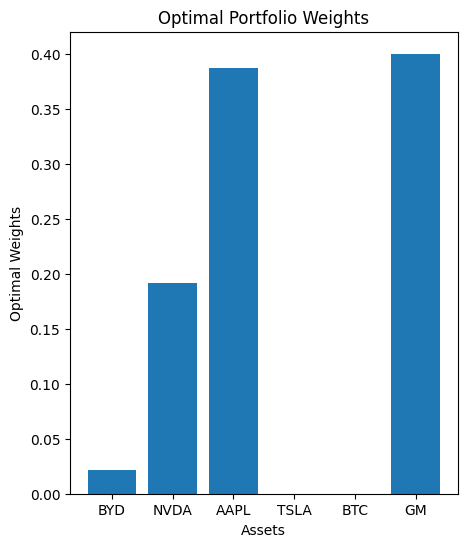

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 6))
plt.bar(tickers, optimal_weights)

plt.xlabel('Assets')
plt.ylabel('Optimal Weights')
plt.title('Optimal Portfolio Weights')

plt.show()